# 세계은행 경제 성장률 데이터로 이란이랑 상관관계가 있는 국가 뽑아보기

-> 이란의 GDP 성장률과 양의 상관관계 혹은 음의 상관관계가 강한 변수를 추출하여 예측모델의 독립변수로 활용하기 위한 과정

In [1]:
import numpy as np
import pandas as pd

In [12]:
world_growth = pd.read_csv(r"C:\Users\LG\Desktop\Paper\Paper_Code\DATA\GROWTH_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_351280.csv", encoding = 'utf-8')
world_growth

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.586575,-0.623626,1.719624,7.048533,2.381730,-2.302837,-23.982580,27.639357,10.458317,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.254876,7.965827,5.148206,4.579317,5.346211,...,4.007577,2.965062,2.219015,2.571941,2.491355,2.040617,-2.799038,4.300441,3.435138,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.857727,3.772943,7.277246,5.412950,4.084749,...,5.926266,2.813543,0.142092,2.286270,2.838829,3.200919,-0.938162,3.976317,3.766354,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.348803,5.916232,5.571775,4.825656,3.406631,4.756801,-5.340275,10.745657,5.218604,NaN
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,1.413826,1.321862,0.664552,1.157947,1.556784,0.259936,-5.963358,4.703062,1.910406,NaN
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,6.234922,5.249622,NaN


In [13]:
world_growth.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [14]:
world_growth["Country Name"].unique

<bound method Series.unique of 0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object>

In [15]:
world_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            124 non-null    float64
 6   1962            128 non-null    float64
 7   1963            128 non-null    float64
 8   1964            128 non-null    float64
 9   1965            128 non-null    float64
 10  1966            136 non-null    float64
 11  1967            139 non-null    float64
 12  1968            140 non-null    float64
 13  1969            143 non-null    float64
 14  1970            141 non-null    float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            155 non-null    flo

In [16]:
# Country Name이 "Iran", "Korea", "United States"인 행만 추출하여 새로운 DataFrame 만들기
# 혹시 관련이 있을까?
countries = world_growth[world_growth['Country Name'].isin(["Iran, Islamic Rep.", "Korea, Rep.", "United States"])]
countries


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
112,"Iran, Islamic Rep.",IRN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,10.390918,7.909268,7.042075,8.475228,17.035712,...,4.984775,-1.424885,8.815087,2.758505,-1.838008,-3.070588,3.330288,4.719778,3.776631,NaN
126,"Korea, Rep.",KOR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,6.935993,3.895273,9.020568,9.473825,7.318434,...,3.202454,2.809103,2.946882,3.159636,2.907404,2.243978,-0.709415,4.304735,2.612672,NaN
251,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,...,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635,NaN


In [17]:
missing_values = countries.isna().any()

# 결측치 어디있나 확인
print("결측치 확인:")
print(missing_values[missing_values].index.tolist())

결측치 확인:
['1960', '2023']


In [18]:
countries.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [19]:
# '1991', '1992'을 포함한 이전 년도 데이터 열 모두 삭제
countries_drop = countries.drop(['Country Code', 'Indicator Name', 'Indicator Code',
    '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
    '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
    '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
    '1987', '1988', '1989', '1990', '1991', '1992', '2023'], axis=1)

countries_drop = countries_drop.reset_index(drop=True)
countries_drop

,Country Name,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Iran, Islamic Rep.",-1.471011,-1.698286,2.401045,6.350526,1.350399,2.080012,2.002696,5.845527,2.392173,...,-1.521979,4.984775,-1.424885,8.815087,2.758505,-1.838008,-3.070588,3.330288,4.719778,3.776631
1,"Korea, Rep.",6.877474,9.268666,9.614565,7.890703,6.170552,-5.129448,11.466942,9.060833,4.852400,...,3.164709,3.202454,2.809103,2.946882,3.159636,2.907404,2.243978,-0.709415,4.304735,2.612672
2,United States,2.751781,4.028793,2.684217,3.772565,4.447175,4.481394,4.794499,4.077159,0.954339,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635


In [20]:
# 'Country Name' 열을 인덱스로 설정
countries_drop.set_index('Country Name', inplace=True)
countries_drop

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
"Iran, Islamic Rep.",-1.471011,-1.698286,2.401045,6.350526,1.350399,2.080012,2.002696,5.845527,2.392173,8.078829,...,-1.521979,4.984775,-1.424885,8.815087,2.758505,-1.838008,-3.070588,3.330288,4.719778,3.776631
"Korea, Rep.",6.877474,9.268666,9.614565,7.890703,6.170552,-5.129448,11.466942,9.060833,4.852400,7.725143,...,3.164709,3.202454,2.809103,2.946882,3.159636,2.907404,2.243978,-0.709415,4.304735,2.612672
United States,2.751781,4.028793,2.684217,3.772565,4.447175,4.481394,4.794499,4.077159,0.954339,1.695943,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635


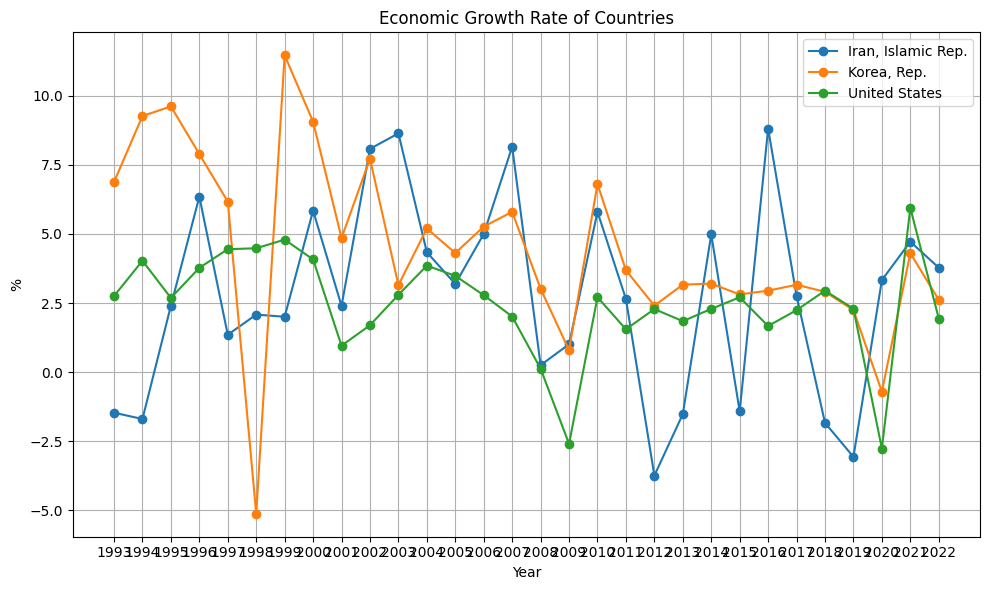

In [21]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 나라별 GDP 그래프 그리기
for country in countries_drop.index:
    plt.plot(countries_drop.columns, countries_drop.loc[country], marker='o', label=country)

# 그래프 제목 및 축 레이블 설정
plt.title('Economic Growth Rate of Countries')
plt.xlabel('Year')
plt.ylabel('%')

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# 각 나라별로 연도별 GDP의 평균, 표준 편차, 최소값, 최대값 등을 계산
summary_statistics = countries_drop.describe()
summary_statistics

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2.719415,3.866391,4.899942,6.004598,3.989376,0.477319,6.088046,6.327840,2.732970,5.833305,...,1.161535,3.491668,1.363529,4.476480,2.720021,1.338260,0.489276,-0.048976,4.989999,2.774979
std,4.174337,5.485280,4.085437,2.080748,2.442469,5.001854,4.862914,2.526603,1.971250,3.587422,...,2.416280,1.371563,2.415384,3.811411,0.460066,2.750794,3.083036,3.102227,0.853100,0.931169
min,-1.471011,-1.698286,2.401045,3.772565,1.350399,-5.129448,2.002696,4.077159,0.954339,1.695943,...,-1.521979,2.287776,-1.424885,1.667472,2.241921,-1.838008,-3.070588,-2.767803,4.304735,1.935635
25%,0.640385,1.165254,2.542631,5.061546,2.898787,-1.524718,3.398598,4.961343,1.673256,4.710543,...,0.159948,2.745115,0.640742,2.307177,2.500213,0.534698,-0.413305,-1.738609,4.512256,2.274153
50%,2.751781,4.028793,2.684217,6.350526,4.447175,2.080012,4.794499,5.845527,2.392173,7.725143,...,1.841875,3.202454,2.706370,2.946882,2.758505,2.907404,2.243978,-0.709415,4.719778,2.612672
75%,4.814628,6.648730,6.149391,7.120615,5.308864,3.280703,8.130721,7.453180,3.622286,7.901986,...,2.503292,4.093614,2.757736,5.880984,2.959070,2.926394,2.269208,1.310437,5.332631,3.194652
max,6.877474,9.268666,9.614565,7.890703,6.170552,4.481394,11.466942,9.060833,4.852400,8.078829,...,3.164709,4.984775,2.809103,8.815087,3.159636,2.945385,2.294439,3.330288,5.945485,3.776631


In [24]:
import seaborn as sns

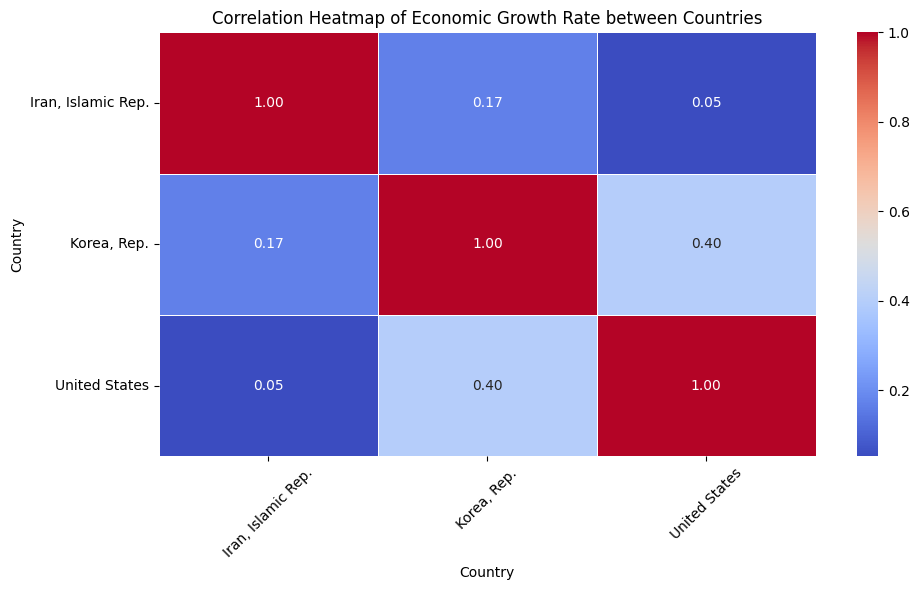

In [26]:
# 데이터 전치
df_transposed = countries_drop.transpose()

# 상관관계 계산
correlation_matrix = df_transposed.corr()

# 히트맵 그래프로 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Economic Growth Rate between Countries')
plt.xlabel('Country')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [69]:
iran = world_growth[world_growth['Country Name'].isin(["Iran, Islamic Rep."])]
iran

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
112,"Iran, Islamic Rep.",IRN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,10.390918,7.909268,7.042075,8.475228,17.035712,...,4.984775,-1.424885,8.815087,2.758505,-1.838008,-3.070588,3.330288,4.719778,3.776631,NaN


In [70]:
# '1991', '1992'을 포함한 이전 년도 데이터 열 모두 삭제
countries_drop = iran.drop(['Country Code', 'Indicator Name', 'Indicator Code',
    '1960', '2023'], axis=1)

countries_drop = countries_drop.reset_index(drop=True)
countries_drop

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Iran, Islamic Rep.",10.390918,7.909268,7.042075,8.475228,17.035712,11.502407,11.252803,14.404183,15.516659,...,-1.521979,4.984775,-1.424885,8.815087,2.758505,-1.838008,-3.070588,3.330288,4.719778,3.776631


In [71]:
# '1991', '1992'을 포함한 이전 년도 데이터 열 모두 삭제
countries_drop = countries_drop.drop(['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
    '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
    '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
    '1987', '1988', '1989', '1990', '1991', '1992'], axis=1)

countries_drop = countries_drop.reset_index(drop=True)
countries_drop


,Country Name,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Iran, Islamic Rep.",-1.471011,-1.698286,2.401045,6.350526,1.350399,2.080012,2.002696,5.845527,2.392173,...,-1.521979,4.984775,-1.424885,8.815087,2.758505,-1.838008,-3.070588,3.330288,4.719778,3.776631


In [72]:
countries_drop.set_index('Country Name', inplace=True)
countries_drop

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
"Iran, Islamic Rep.",-1.471011,-1.698286,2.401045,6.350526,1.350399,2.080012,2.002696,5.845527,2.392173,8.078829,...,-1.521979,4.984775,-1.424885,8.815087,2.758505,-1.838008,-3.070588,3.330288,4.719778,3.776631


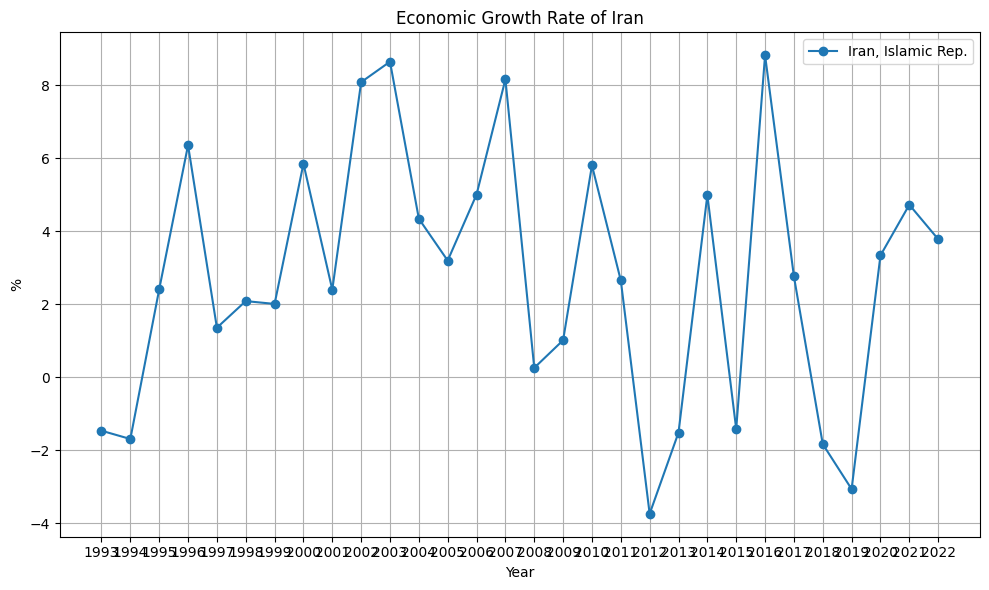

In [74]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 나라별 GDP 그래프 그리기
for country in countries_drop.index:
    plt.plot(countries_drop.columns, countries_drop.loc[country], marker='o', label=country)

# 그래프 제목 및 축 레이블 설정
plt.title('Economic Growth Rate of Iran')
plt.xlabel('Year')
plt.ylabel('%')

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()

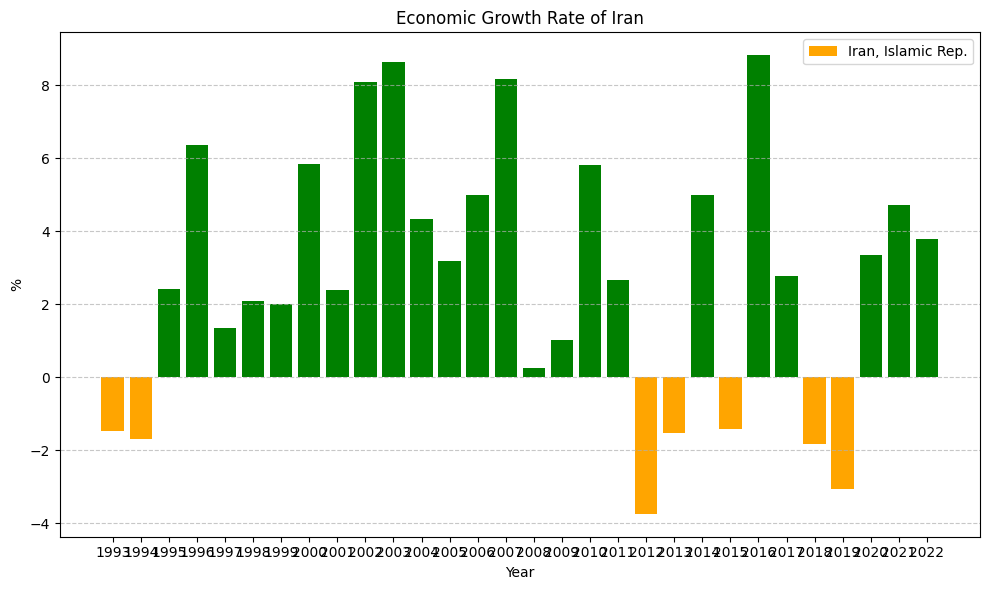

In [78]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 나라별 GDP 그래프 그리기
for country in countries_drop.index:
    growth_rates = countries_drop.loc[country]
    colors = ['orange' if rate < 0 else 'g' for rate in growth_rates]  # 0보다 작은 경우 빨간색, 그렇지 않으면 파란색
    plt.bar(countries_drop.columns, growth_rates, color=colors, label=country)

# 그래프 제목 및 축 레이블 설정
plt.title('Economic Growth Rate of Iran')
plt.xlabel('Year')
plt.ylabel('%')

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
